# Assignment Week 2_MM73053
Answer each question completely. Include your code and summarize what you see in a brief narrative.

### Charting:
Remember to make your charts as self-sufficient as possible (i.e., labels, titles, lack of clutter)  

In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

df = pd.read_csv('car_prices.csv', low_memory=False)

# Data Description:
- year: year the car was built (e.g., the model year)  
- make: the manufacturer. 
- model: specific model of the car  
- trim: subtype of the car model. 
- body: body style of the car. 
- transmission: type of transmission  
- vin: unique identifier of the car. 
- state: state car is registered. 
- condition: numerical rating of the condition, higher is better.  
- odometer: number of miles the car has been driven.   
- color: color of the car.  
- interior: type of interior (e.g., seats). 
- seller: who sold the car.  
- mmr: estimated wholesale price of the car.  
- sellingprice: actual sales price of the car.  
- saledate: date and time of the sale. 

# Question 1. Determine the number of missing values in each column.

In [145]:
df.head() #Checking the file

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5,16639.0,white,black,"kia motors america, inc",20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5,9393.0,white,beige,"kia motors america, inc",20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,4.5,1331.0,gray,black,financial services remarketing (lease),31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,4.1,14282.0,white,black,volvo na rep/world omni,27500,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,4.3,2641.0,gray,black,financial services remarketing (lease),66000,67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [146]:
df.isnull().sum() #Number of NA values based on each column

year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65353
vin                 4
state               0
condition       11794
odometer           94
color             749
interior          749
seller              0
mmr                 0
sellingprice        0
saledate            0
dtype: int64

Sample narrative description.

# Question 2. Check the data types. Which columns are coded to the incorrect type? If any, correct them.

In [147]:
df.info() #column types Info


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493484 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547043 non-null  object 
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558837 non-null  object 
 14  sellingprice  558837 non-null  int64  
 15  saledate      558837 non-null  object 
dtypes: float64(1), int64(2), object(13)
memory usage: 68.2+ MB


In [148]:
#Dropping the rows, where there are non-Digit characters are present in CONDITION col
pattern = r'\D' #[A-Za-z]
df.drop(df[df.condition.str.contains(pattern, na=False)].index, inplace=True)
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5,16639.0,white,black,"kia motors america, inc",20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5,9393.0,white,beige,"kia motors america, inc",20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
5,2015,Nissan,Altima,2.5 S,Sedan,automatic,1n4al3ap1fn326013,ca,1,5554.0,gray,black,enterprise vehicle exchange / tra / rental / t...,15350,10900,Tue Dec 30 2014 12:00:00 GMT-0800 (PST)
7,2014,Chevrolet,Cruze,1LT,Sedan,automatic,1g1pc5sb2e7128460,ca,2,28617.0,black,black,enterprise vehicle exchange / tra / rental / t...,11900,9800,Tue Dec 16 2014 13:00:00 GMT-0800 (PST)
9,2014,Chevrolet,Camaro,LT,Convertible,automatic,2g1fb3d37e9218789,ca,3,4809.0,red,black,d/m auto sales inc,26300,17500,Tue Jan 20 2015 04:00:00 GMT-0800 (PST)


In [149]:
df['condition'] = df['condition'].astype(float) #converting CustomerID from Float to Integer type
df['mmr'] = df['mmr'].astype(int) #converting CustomerID from Float to Integer type
df['saledate'] = pd.to_datetime(df['saledate'], errors='coerce') #converting CustomerID from Float to Integer type

In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81895 entries, 0 to 558833
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          81895 non-null  int64  
 1   make          79861 non-null  object 
 2   model         79848 non-null  object 
 3   trim          79742 non-null  object 
 4   body          78905 non-null  object 
 5   transmission  70645 non-null  object 
 6   vin           81895 non-null  object 
 7   state         81895 non-null  object 
 8   condition     70101 non-null  float64
 9   odometer      81824 non-null  float64
 10  color         81705 non-null  object 
 11  interior      81705 non-null  object 
 12  seller        81895 non-null  object 
 13  mmr           81895 non-null  int32  
 14  sellingprice  81895 non-null  int64  
 15  saledate      81895 non-null  object 
dtypes: float64(2), int32(1), int64(2), object(11)
memory usage: 10.3+ MB


Sample narrative description.

# Question 3. Analyze the 'make' column. Comment on what you observe. Clean the column to reduce the number of unique values to as few as reasonably possible (no hard coding). 
Hint: What do you notice if you run this:
```python
makes = df.make.unique().tolist()
makes = [str(x).lower() for x in makes]
sorted(makes)
```

In [151]:
df.make.unique()

array(['Kia', 'Nissan', 'Chevrolet', 'Ford', 'Hyundai', 'BMW', 'Buick',
       'Audi', 'Volvo', 'Infiniti', 'Mazda', 'Lexus', 'MINI',
       'Land Rover', 'Jaguar', 'Mercedes-Benz', 'Volkswagen', 'Toyota',
       'Scion', 'Subaru', 'bmw', 'Acura', nan, 'Chrysler', 'Cadillac',
       'Dodge', 'Honda', 'GMC', 'Lincoln', 'Jeep', 'Ram', 'mitsubishi',
       'Bentley', 'chevrolet', 'Mitsubishi', 'ford', 'Pontiac', 'Saturn',
       'land rover', 'mazda', 'mercedes', 'Mercury', 'gmc truck',
       'HUMMER', 'landrover', 'FIAT', 'chrysler', 'honda', 'cadillac',
       'Porsche', 'Suzuki', 'Saab', 'dodge', 'lexus', 'nissan', 'subaru',
       'Oldsmobile', 'oldsmobile', 'hyundai', 'toyota', 'jeep', 'Isuzu',
       'Geo', 'smart', 'Maserati', 'volkswagen', 'pontiac', 'audi',
       'Rolls-Royce', 'suzuki', 'gmc', 'mazda tk', 'lincoln', 'acura',
       'mercury', 'buick', 'hyundai tk', 'mercedes-b', 'vw', 'Daewoo',
       'chev truck', 'Plymouth', 'ford truck', 'plymouth', 'Tesla',
       'airstre

In [152]:
df.make.nunique() 

88

In [153]:
df['make'] = df['make'].replace([' tk',' truck'], '',regex=True)

In [154]:
df.make.nunique()

84

In [155]:
makes = df.make.unique().tolist()
makes = [str(x).lower() for x in makes]
sorted(makes)

['acura',
 'acura',
 'airstream',
 'aston martin',
 'audi',
 'audi',
 'bentley',
 'bmw',
 'bmw',
 'buick',
 'buick',
 'cadillac',
 'cadillac',
 'chev',
 'chevrolet',
 'chevrolet',
 'chrysler',
 'chrysler',
 'daewoo',
 'dodge',
 'dodge',
 'ferrari',
 'fiat',
 'fisker',
 'ford',
 'ford',
 'geo',
 'gmc',
 'gmc',
 'honda',
 'honda',
 'hummer',
 'hyundai',
 'hyundai',
 'infiniti',
 'isuzu',
 'jaguar',
 'jeep',
 'jeep',
 'kia',
 'land rover',
 'land rover',
 'landrover',
 'lexus',
 'lexus',
 'lincoln',
 'lincoln',
 'maserati',
 'mazda',
 'mazda',
 'mercedes',
 'mercedes-b',
 'mercedes-benz',
 'mercury',
 'mercury',
 'mini',
 'mitsubishi',
 'mitsubishi',
 'nan',
 'nissan',
 'nissan',
 'oldsmobile',
 'oldsmobile',
 'plymouth',
 'plymouth',
 'pontiac',
 'pontiac',
 'porsche',
 'ram',
 'rolls-royce',
 'saab',
 'saturn',
 'scion',
 'smart',
 'subaru',
 'subaru',
 'suzuki',
 'suzuki',
 'tesla',
 'toyota',
 'toyota',
 'volkswagen',
 'volkswagen',
 'volvo',
 'vw']

Sample narrative description.

# Question 4. Analyze the relationship between the wholeprice 'mmr' and the sales price. What is the overall correlation? What happens to the correlation as you increase the maximum selling price window (e.g., 0-10000, 0-20000,...)?
- Create a scatter plot with the relationship.  
- Create a graph that shows how the correlation changes.

<AxesSubplot:>

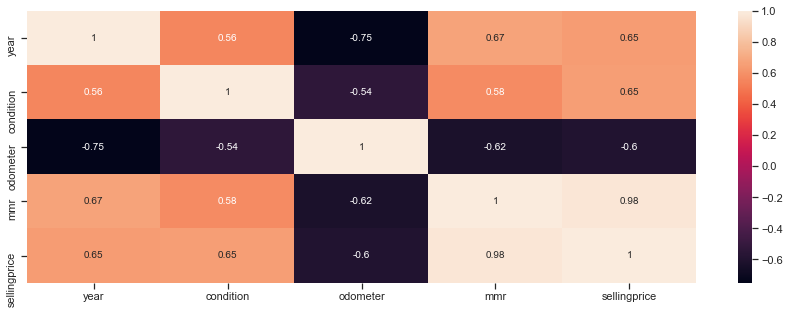

In [156]:
#checking coorelation
plt.figure(figsize=(15, 5))
sns.heatmap(df.corr(), annot=True)

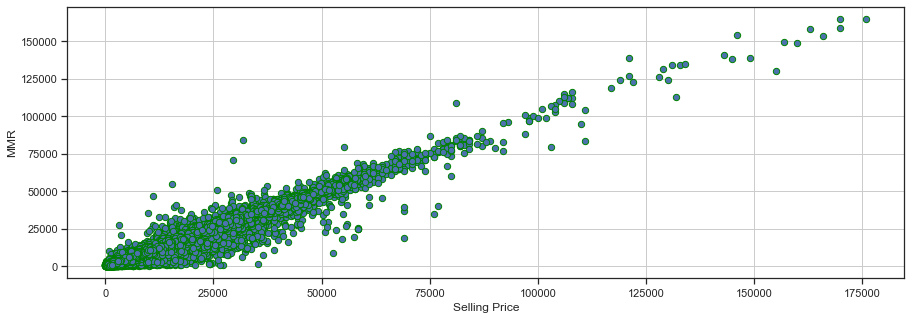

In [157]:
fig, ax = plt.subplots(figsize=(15,5))
ax.scatter(x = df['mmr'], y = df['sellingprice'], edgecolor ="green",s=40)
plt.xlabel('Selling Price')
plt.ylabel('MMR')
plt.grid()
plt.show()

I see there is positive coorelation as SP increases

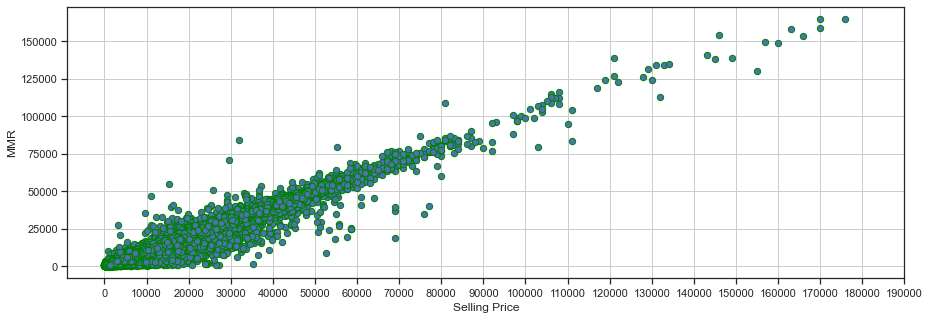

In [158]:
fig, ax = plt.subplots(figsize=(15,5))
ax.scatter(x = df['mmr'], y = df['sellingprice'], edgecolor ="green",s=40)
ax.xaxis.set_ticks(np.arange(0, 200000, 10000))
plt.xlabel('Selling Price')
plt.ylabel('MMR')
plt.grid()
plt.show()

There is no change in corelation when the boundaries are extended

# Question 5. How does the distribution of sales price vary by make for cars made between 2010-2015? Use the 10 most common makes (your cleaned version of this column). Create a graph that answers this question.

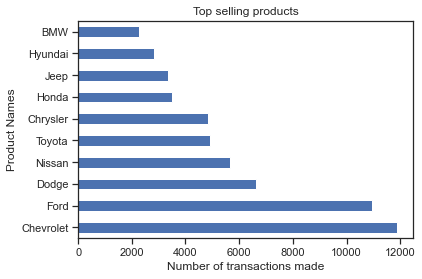

In [159]:
t= df.groupby('make')['saledate'].count().sort_values(ascending=False).head(10).plot(kind='barh')
plt.ylabel('Product Names')
plt.xlabel('Number of transactions made')
plt.title('Top selling products')
plt.show()

In [166]:
type(df_new)

pandas.core.frame.DataFrame

In [123]:
df_new = df[['make','sellingprice', 'year']]
df_new = df_new[(df_new['year']> 2010)&(df_new['year']< 2016)]
df_new = df_new[df_new['make'].isin(df_new.make.value_counts()[:10].index)]
df_new

,make,sellingprice,year
0,Kia,21500,2015
1,Kia,21500,2015
5,Nissan,10900,2015
7,Chevrolet,9800,2014
9,Chevrolet,17500,2014
...,...,...,...
558654,Honda,15800,2014
558662,Chrysler,17900,2013
558778,Nissan,4000,2015
558811,Hyundai,10800,2013


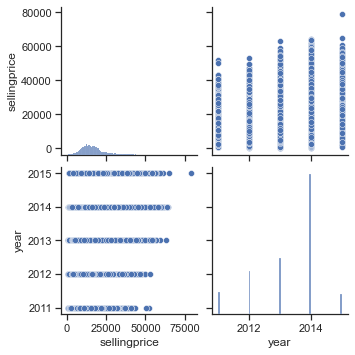

In [168]:
sns.pairplot(df_new)

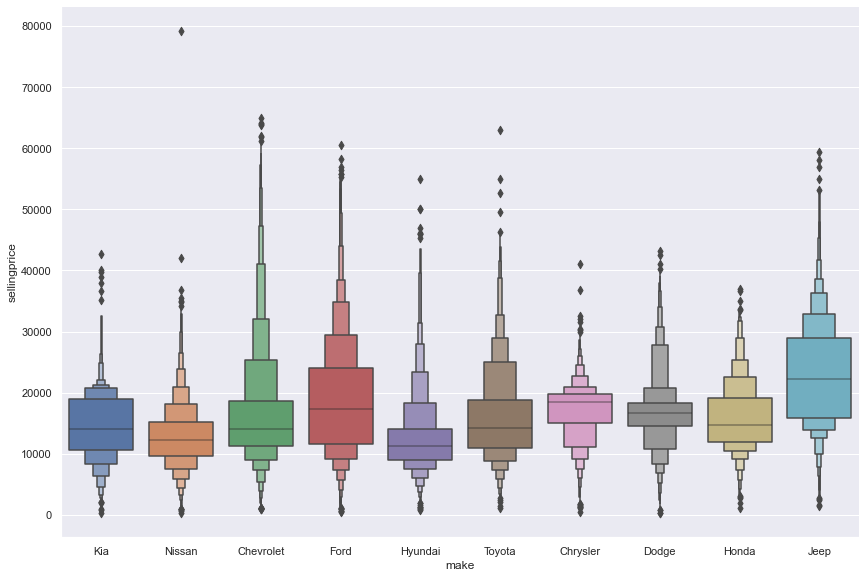

In [200]:

sns.catplot(x="make", y="sellingprice", data=df_new ,height=8, aspect=1.5, kind='boxen')
